# Differential event rate


$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi m_N} \int_{v_\text{min}}^{v_\text{max}} v f(v) \frac{d\sigma}{dE_R} dv
$$

The differential event rate gives the number of expected events per kg material per a unit energy and is of essential importance for direct dark matter detections. It predicts what a possible signal would look like in a detector.

## Velocity density distribution 

The three dimensional velocity function follows a Maxwell function
$$
f_{gal}(\textbf{v}) = \frac{1}{\sqrt{2 \pi}\sigma_{v}} \exp \left(\frac{-|\textbf{v}|^2 } {2\sigma_{v}^2}\right)
$$

However, this assumes a static reference frame. In reality the detector is located on the Earth, which rotates, orbits the Sun and moves with the Sun through the Galaxy. This influences the velocity distribution observed at Earth. Since most Dark Matter direct detectors measure for a long time, it is a reasonable approximation to look at just the movement of the Sun through the Galaxy, which is $v_\text{Earth} = 220 \pm 20$ km/s. [1]

$$
 f(\mathbf{v}) = f_\text{Gal}(\mathbf{v}-\mathbf{v}_\text{Earth})
$$

Furthermore, the current detectors are not direction dependent. Therefore, the velocity distribution can be rewritten as a speed distribution. For the uncorrected veloctiy function this becomes:

$$
 f_{gal}(v) \text{ ~ } v^2 \exp \left(\frac{-|v|^2}{2\sigma_{v}^2} \right)
$$

Once we introduce the correction of the earth the calculation becomes more complex. 

$$
 f(v) = \int\int d\theta  \frac{1}{\sqrt{2 \pi}\sigma_v}\exp \left( \frac{-|\textbf{v}-\textbf{v}_\text{Earth}|}{2\sigma_v^2} \right) d\cos\theta 
$$

$$
 f(v) = \int\int d\theta  \frac{1}{\sqrt{2 \pi}\sigma_v}\exp \left( \frac{-v^2-v_\text{Earth}^2+2v_\text{Earth}v\cos \theta}{2\sigma_v^2} \right) d\cos\theta 
$$

$$
f(v) =2 \pi \frac{1}{\sqrt{2 \pi}\sigma_v}v^2\exp \left( \frac{-v^2-v_\text{Earth}^2}{2\sigma_v^2} \right) \int \exp \left( \frac{2 v_\text{Earth}v \cos \theta}{2 \sigma_v^2}  \right) d\cos \theta
$$

This results in the Standard Halo Model, where the slope of the higher energy particles extends further compared to a gaussian. 


$$
f(v) = \frac{v}{\sqrt{2 \pi}\sigma_v v_e N_\text{esc}} 
\begin{cases}
    0 & \mbox{if } v \gt v_\text{esc}+v_e \\
    \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] - \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] & \mbox{if } v \lt v_\text{esc}-v_e \\
    \exp \left[-\frac{(v-v_e)^2}{2\sigma_v^2} \right] - \exp \left[-\frac{v_\text{esc}^2}{2\sigma_v^2} \right] & 
    \mbox{otherwise}
\end{cases}
$$


The escape velocity for dark matter $v_\text{esc}$ is assumed to be the galactic escape speed, which is around 550 km/s [2]. The number of escaping particles is necessary to calculate the speed distribution, which can be calculated as followed: 

$$
N_\text{esc} = \text{erf}\left( \frac{v_\text{esc}}{\sqrt{2}\sigma_v} \right) - \sqrt{\frac{2}{\pi}} \frac{v_\text{esc}}{\sigma_v} \exp \left( -\frac{v_\text{esc}^2}{2\sigma_v^2} \right)
$$

[1] F. J. Kerr and D. Lynden-Bell, “Review of galactic constants”, Mon. Not. Roy. Astron. Soc., vol. 221, p. 1023, 1986.


[2] T. Piffl et al., "The RAVE survey: the Galactic escape speed and the mass of the Milky Way", Astron. Astrophys. 562 (2014) A91.



In [218]:
# Initialise packages
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special,integrate
from matplotlib import rc

# Initialise LaTex
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# global constants
amu = .935         # From AMU to GeV


In [219]:
# Relevant speeds

v_e = 220.        # average speed Earth   [km/s]
v_esc = 550.      # galactic escape speed [km/s]
sigma = 270.      # velocity dispersion   [km/s]

velocity = np.logspace(-1,3,1000)

In [220]:
def N_esc(v_esc, sigma):
    """
    Calculate the number of particles escaping
    
    Input: 
    - v_esc:    escape speed.                 [km/s]
    - sigma:    speed distribution dispersion [km/s]
    
    Output:
    - Number of escaping dark matter particles
    """
    a = v_esc**2/(2*sigma**2)
    return special.erf(np.sqrt(a))  - np.sqrt(2/np.pi) * v_esc/sigma *np.exp(-a)

In [221]:
def speed_dist(v, v_e, v_esc, sigma):
    """
    Give the probability for a given speed. 
    
    Input: 
    - v:      speed                  [km/s]
    - v_e:    Earth's speed          [km/s]
    - v_esc:  Galactic escape speed  [km/s]
    - sigma:  Speed dist. dispersion [km/s]
    
    Ouput: 
    - probability density            [s/km]
    """
    
    factor = v / (np.sqrt(np.pi*2)*sigma*v_e*N_esc(v_esc, sigma))
    
    if v > v_esc+v_e:
        return 0 
    elif v < v_esc-v_e:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-(v+v_e)**2/(2*sigma**2)))
    else:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-v_esc**2/(2*sigma**2)))

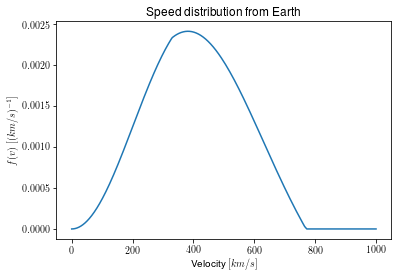

In [222]:
# Plot the speed distribution
plt.plot(velocity, [speed_dist(i, v_e, v_esc, sigma) for i in velocity])
plt.title(r"Speed distribution from Earth")
plt.ylabel(r"$f(v)\ [(km/s)^{-1}]$")
plt.xlabel(r"Velocity $[km/s]$")
plt.show()

## Interaction cross section

The interaction cross section can be split into an spin-dependent and spin-independent. We will first look at the spin-independent part.

$$
 \frac{d\sigma}{dE_R} = \frac{d\sigma_\text{SD}}{dE_R} + \frac{d\sigma_\text{SI}}{dE_R}
$$

Assuming the interaction strength of the neutron-DM and proton-DM is the same, the spin-independent part can be written as: 

$$
\frac{d\sigma_\text{SI}}{dE_R} = \frac{m_N \sigma_p^\text{SI}}{2\mu_{\chi p}^2 v^2} A^2 F^2_\text{SI}(E_R),
$$
where 

- $m_N$: the mass of the nucleus
- $\sigma_p^\text{SI}$: the interaction strength between a dark matter particle and proton at zero momentum
- $\mu_{\chi p}$ the reduced mass of the proton-WIMP system ($=\frac{m_\chi m_p}{m_\chi+m_p}$)
- $A$ the atomic mass number of the target
- $F$ the form factor correction

## Form Factor

Due to the particle wavelength being smaller than the radius of the proton, the cross section has to be corrected to be smaller. This is done using a parametrisation: the Helm form. 

$$
F^2_\text{SI}(E_R) = \left[ \frac{3 j_1(qR_1)}{qR_1}\right]^2 e^{-q^2 s^2}
$$
with 
$$
q = \sqrt{2 m_N E_R}, 
$$
and R_1 comes from spectroscopy data. 

$$
R_1 = \sqrt{c^2 +\frac{7}{3}\pi^2 a^2 - 5s^2}
$$

$$
c = 1.23 A^{1/3}-0.60 \text{ fm}
$$

$$
a = 0.52 \text{ fm}
$$

$$
s = 0.9 \text{ fm}
$$


To achieve the right units, R1 and s have to be transformed to be in natural units, preferably GeV. This is done by using the transformation that $0.1975 \text{ fm} = \frac{1}{\text{GeV}}$.



[3] B.J. Kavanagh, M Fornasa, A.M. Green, "Probing WIMP particle physics and astrophysics with direct detection and neutrino telescope data", Phys. Rev., vol. 91, issue 10  

In [223]:
def FSquared(E_R, A):
    """
    Calculate the form factor given an recoil energy and atomic mass number using the Helm parameterisation. 
    
    Input: 
    - E_R   Recoil Energy in GeV
    - A:    Atomic mass number 
    
    Output: 
    - Form Factor
    """
    m = 0.9315*A  # GeV  
    s = 0.9       # fm
    a = 0.52      # fm
    c = 1.23*A**(1/3) - 0.60  # fm
    R1 = np.sqrt(c**2 + 7/3 * np.pi**2 *a**2  - 5*s**2)  # fm
   
    # Transform to natural units
    R1_NU = R1/0.1975       # GeV^-1
    s_NU = s/0.1975         # GeV^-1
    q = np.sqrt(2*m*E_R)    # GeV
    
    j_n = special.spherical_jn(1,q*R1_NU)
    
    return(3*j_n/(q*R1_NU))**2 * np.exp(-q**2 *s_NU**2)


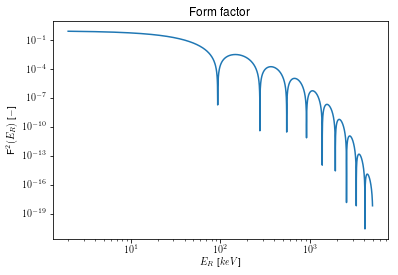

In [224]:
# Plot the form factor for Xenon-132
E_R = np.linspace(2E-6,5E-3,10000)   #GeV
F2 = [FSquared(q,132) for q in x]    

plt.loglog(E_R*1E6,F2)
plt.title("Form factor")
plt.xlabel(r"$E_R$ [$keV$]")
plt.ylabel(r"F$^2(E_R)$ [$-$]")
plt.show()

## Integrated speed distribution

If just the spin-independent part is considered the event rate can be split into a speed-dependent and speed-independent part. The speed-dependent part of the interaction rate can be rewritten as: 

$$
\eta(v_{min}) = \frac{1}{2v_e N_\text{esc}}
\begin{cases} 
    0 & \mbox{if } v_\text{min} > v_\text{esc} + v_\text{e} \\ 
    \text{erf}[\alpha_+]-\text{erf}[\alpha_-]-2\frac{v_e}{\sigma_v}\sqrt{\frac{2}{\pi}} \exp \left(-\alpha_\text{esc}^2 \right) & \mbox{if } v_\text{min} < v_\text{esc}- v_\text{e}  \\
    \text{erf}[\alpha_\text{esc}]-\text{erf}[\alpha_-] - \frac{v_\text{esc}+v_\text{e}-v_\text{min}}{\sigma_v}\sqrt{\frac{2}{\pi}}\exp \left(-\alpha_\text{esc}^2 \right) & \mbox{otherwise}
\end{cases}
$$
with 

$$
\alpha_\pm(v_\text{min}) = \frac{v_\text{min} \pm v_\text{e}}{\sqrt{2}\sigma_v} \mbox{ and } \alpha_\text{esc} = \frac{v_\text{esc}}{\sqrt{2}\sigma_v}
$$

This can also be writen as:

$$
\eta(v_\text{min}) = \frac{1}{2v_\text{e}N_\text{esc}} \left(\text{erf}[\tilde \alpha_+] - \text{erf}[\tilde \alpha_-] - \frac{2}{\sqrt{\pi}} (\tilde \alpha_+ - \tilde \alpha_-) \exp[-\alpha^2_\text{esc}] \right)
$$
where 

$$
\tilde \alpha_\pm(v_\text{min}) = min(\alpha_\pm, \alpha_\text{esc})
$$


$$
v_\text{min} = \sqrt{\frac{m_\text{N}E_R}{2\mu_{\chi N}}}
$$

$v_\text{min}$ is the lowest dark matter velocity at which a recoil event can still take place. 


In [225]:
def speed_integrated(v_min, v_earth, v_esc, sigma):
    """
    Return the value of the integrated speed distribution in the interaction rate.
    
    Input
    - v_min:      min. recoil v   [km/s]
    - v_esc:      Gal. esc. v     [km/s]
    - v_earth:    Earth's v       [km/s]
    - sigma:      vel. dispersion [km/s]
    
    Ouput: 
    - integrated speed function   [s/km]
    """
    a_esc = v_esc / (np.sqrt(2)*sigma)
    ap = min( (v_min + v_earth)/(np.sqrt(2)*sigma), a_esc)
    am = min( (v_min - v_earth)/(np.sqrt(2)*sigma), a_esc)
    return 1/(2*v_earth*N_esc(v_min, sigma))* (special.erf(ap)-special.erf(am)- (2/np.sqrt(np.pi))*(ap - am)*np.exp(-a_esc**2))

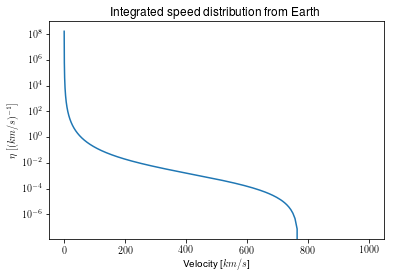

In [226]:
# Plot the integrated speed distribution
plt.semilogy(velocity, [speed_integrated(i, v_e, v_esc, sigma) for i in velocity])
plt.title(r"Integrated speed distribution from Earth")
plt.ylabel(r"$\eta\ [(km/s)^{-1}]$")
plt.xlabel(r"Velocity [$km/s$]")
plt.show()

# The Differential Interaction Rate

Now that the speed distribution has been integrated. The differential event/interaction rate can be simplified. 


$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi} \frac{\sigma^\text{SI}_p A^2 F^2(E_R)}{2 \mu_{\chi p}^2} \int_{v_\text{min}}^{v_\text{esc}} \frac{f(v)}{v} dv
$$

$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi} \frac{\sigma^\text{SI}_p A^2 F^2(E_R)}{2 \mu_{\chi p}^2} \eta(v_\text{min})
$$

Several variables will still have to be defined:

- $\rho_0$ is the dark matter mass density. Often estimated to be 0.3 $\pm$ 0.05 GeV/$c^2$.
- $m_\chi$ is the dark matter particles mass. 



In [227]:
def v_min(E_R, A, DM_mass):
    """
    Calculate the minimum velocity at which the energy can still create a recoil effect
    
    Input:
    - E_R:        Recoil Energy in GeV
    - A:          The atomic mass number of detector
    - DM_mass:    The mass of the WIMP in GeV
    
    Output: 
    - v_min:      Minimum velocity to have a recoil effect
    """
    
    m_N = 0.9315*A                       # GeV Atomic number conversion
    mu = (m_N*DM_mass)/(m_N + DM_mass)
    return np.sqrt((m_N * E_R)/(2*mu**2))

In [245]:
def diff_int_rate(E_R, DM_mass, A, int_cross=1., v_esc=v_esc, v_earth=v_e, sigma=sigma):
    """
    Calculate the differential interaction rate. 
    
    Input:
    - E_R:        Recoil Energy in GeV
    - DM_mass:    The mass of the WIMP in GeV
    - int_cross:  Interaction cross section between the WIMP and a proton at zero momentum in cm^2
    - A:          The atomic mass number of detector
    - v_esc:      Escape velocity of the DM particles in km/s
    - v_earth:    The velocity of the earth in km/s
    - sigma:      Deviation in the velocity distribution in km/s
    
    Output:
    - dRdE:       Differential interaction rate in events day^-1 kg^-1 keV^-1
    """
    
    m_p = 0.9315  # GeV
    rho = 0.30    # ± 0.05 GeV / cm^3
    mu = (DM_mass * m_p)/ (DM_mass + m_p)    # GeV
    v_m = v_min(E_R, A, DM_mass)
    dRdE = (rho/DM_mass * (int_cross * A**2 * FSquared(E_R, A))/(2*mu**2) * 
            speed_integrated(v_m, v_earth, v_esc, sigma)) # s cm^-2 km^-1 GeV^-2
    return dRdE*1E-19/(1.78E-36*2.9979E8)*24*3600 # day^-1 kg^-1 keV^-1

## Plotting the differential interation rate

Using the code below it is possible to show differential interaction rates for different target materials.

The dark matter mass and the dark matter-proton cross section are free parameters. 

In [248]:
targets = {"Xenon-132": 132,
           "Argon-40": 40,
           "Germanium-74":74}

# Recoil space
E_recoil = np.linspace(2e-6,5e-3,10000)

# Dark matter mass in GeV
DMmass = [10,50,100,500]

# Dark matter - proton interaction cross section
sigma_p = 1e-30

dRdE_test = [diff_int_rate(E, DMmass[2], targets["Xenon-132"],sigma_p) for E in E_recoil]


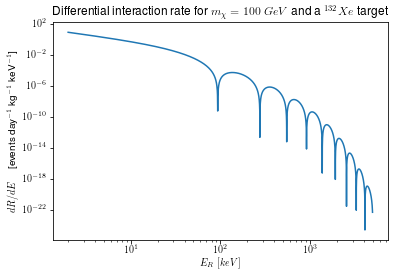

In [247]:
plt.loglog(E_recoil*1e6,dRdE_test)
plt.xlabel(r'$E_R\ [keV]$')
plt.ylabel(r'$dR/dE \quad$ [events day$^{-1}$ kg$^{-1}$ keV$^{-1}$]')
plt.title(r'Differential interaction rate for $m_\chi=100\ GeV$ and a ${}^{132}Xe$ target')
plt.show()

# Integrated Interaction Rate

The differential event rate shows the signal a dark matter particke would have inside a specific detector. However, it is more interesting to look at the total rate of interaction, since it allows for an expected signal per dark matter mass. 

The threshold energy ($E_T$) is determined by the properties of the detector, while the maximum energy comes from the maximum velocity of the dark matter particle. This is already included in the integral over $v$ and can be changed to integrate till infinite. 


$$
R=\int _{E_T}^{E_{max}}\frac{dR}{dE}
$$

$$
\frac{dR}{dE_R} = \frac{\rho_0}{m_\chi} \frac{\sigma^\text{SI}_p A^2 F^2(E_R)}{2 \mu_{\chi p}^2} \eta(v_\text{min})
$$

In [249]:
def rate(DM_mass, A, E_T, E_max, int_cross=sigma_p):
    R = integrate.quad(lambda v: diff_int_rate(v, DM_mass, A, int_cross),E_T,E_max)
    return R

In [184]:
massDM = 100            # GeV
A_Xe = 129              # Often used isotope in Xenon detectors
E_thres = np.logspace(-6,-4,100)
rate_new = [rate(DM_mass = massDM, A=A_Xe, E_T=E, E_max = 1E-4, int_cross=sigma_p)[0] for E in E_thres]

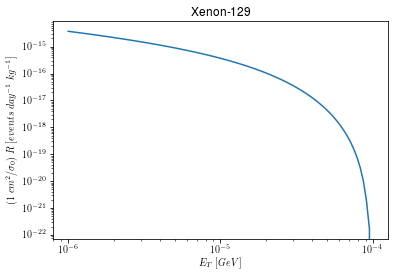

In [185]:
# Plot the total interaction rate per threshold energy
plt.loglog(E_thres,rate_new)
plt.xlabel(r'$E_T\ [GeV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ R\ [events\ day^{-1}\ kg^{-1}]$')
plt.title(r'Xenon-129')
plt.show()

# Spin-dependent Interaction

The spin-dependent part of the differential cross section is as follows: 

$$
\frac{d\sigma_\text{SD}}{dE_R} = \frac{m_N \sigma_p^\text{SD}}{2\mu_{\chi p}^2 v^2} \frac{2(J+1)}{3J} \left(\langle S_p \rangle + \frac{a_n}{a_p} \langle S_n \rangle \right)^2 F^2_\text{SD}(E_R)
$$
The $1/v^2$ can be removed, since it is taken into the integration of $v$ in $\eta$. It is often assumed that the coupling strength between protons and neutrons is the same ($a_n = a_p$) and the form factor can be rewritten as a combination of spin structure values giving us: 

$$
\frac{d\sigma_\text{SD}}{dE_R} = \frac{8 \pi m_N \sigma_p^\text{SD}}{3\mu_{\chi p}^2} \frac{S_{00}(E_R)}{(2J+1)}
$$
with

$$
S_{ij} = N((1-\beta)e^{-\alpha u} + \beta)
$$
where $\alpha, \beta, N$ are parameters, while $u$ can be calculated with 

$$
u = \frac{(qb)^2}{2}, \quad b = \sqrt{\frac{41.467}{(45.0A^{-1/3} -25.0A^{-2/3})}}\text{  fm.}
$$
Here $q$ is the momentum transfer
$$
q=\sqrt{2m_NE_R}.
$$

This can be used to calculate the SD differential interaction rate
$$
\frac{dR}{dE} = \frac{\rho_0}{m_\chi m_N} \frac{d\sigma_{SD}}{dE_R} \eta (v_{min})
$$


## Spin structure 

In [186]:
def diff_cross_section(E_R, A, J, parameters, DM_mass, int_cross=sigma_p):
    """
    Calculation of the spin dependent differential cross section.
    
    Input:
    - E_R:        Recoil Energy in GeV
    - A:          The atomic mass number of the detector
    - J:          The spin of the atoms in the detector
    - parameters: Detector dependent parameter
    - DM_mass:    The mass of the dark matter particles in GeV
    - int_cross:  Interaction cross section between the WIMP and a proton at zero momentum in cm^2
    
    Output:
    - Spin dependent differential cross section
    """
    
    [alpha, beta, N] = parameters
    
    m_N = .9315 * A                          # GeV
    m_p = .9315                              # GeV
    mu = (DM_mass**2 + m_p**2)/(DM_mass*m_p) # GeV 
    
    q = np.sqrt(2*m_N*E_R)                   # GeV
    b = np.sqrt(41.467/(45*A**(-1/3) -25*A**(-2/3))) # fm
    b_NU = b/0.1975                          # GeV^-1
    u = (q*b_NU)**2/2                        # No unit
    
    S = N*((1-beta)*np.exp(-alpha*u) + beta) # No unit
    
    dSigma_dE = 8*np.pi*m_N*int_cross/(3*mu**2) * S / (2*J+1) # cm^2 / GeV
    
    return dSigma_dE

In [187]:
def SD_diff_int_rate(E_R, A, J, parameters, DM_mass, v_esc, v_earth, sigma, int_cross=sigma_p):
    """
    Calculate the spin dependent differential interaction rate. 
    
    Input:
    - E_R:        Recoil Energy in GeV
    - A:          The atomic mass number of the detector
    - J:          The spin of the atoms in the detector
    - parameters: Detector dependent parameter
    - DM_mass:    The mass of the dark matter particles in GeV
    - v_esc:      Escape velocity of the DM particles in km/s
    - v_earth:    The velocity of the earth in km/s
    - sigma:      Deviation in the velocity distribution in km/s
    - int_cross:  Interaction cross section between the WIMP and a proton at zero momentum in cm^2
    
    Output:
    SD differential interaction rate in events day^-1 kg^-1 keV^-1
    """
    
    rho = 0.30        # ± 0.05 GeV / cm^3
    m_N = 0.9315 * A  # GeV
    v_m = v_min(E_R, A, DM_mass)
    dRdE = (rho/(DM_mass*m_N) * diff_cross_section(E_R, A, J, parameters, DM_mass, int_cross) * 
            speed_integrated(v_m, v_earth, v_esc, sigma)) # s cm^-1 km^-1 GeV^-2
    
    return dRdE*1E-19/(1.78E-36*2.9979E8)*24*3600 # day^-1 kg^-1 keV^-1

In [188]:
para = [0.0595, 3.75, 0.0096] # for Xe-129
A = 129 # for Xe-129
J = 1/2 # for Xe-129
DM_mass = 100 # GeV

SD_recoil = np.linspace(2E-6,5E-3,10000)
dR_dE_SD = [SD_diff_int_rate(E_R, A, J, para, DM_mass, v_esc, v_e, sigma) for E_R in SD_recoil]

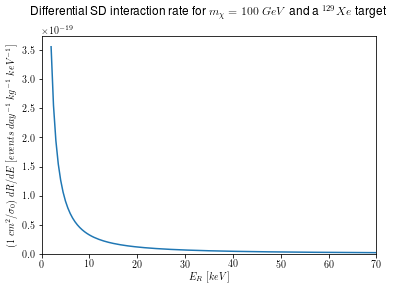

In [189]:
plt.plot(SD_recoil*1E6,dR_dE_SD)
plt.xlim([0,70])
plt.ylim(ymin=0)
plt.xlabel(r'$E_R\ [keV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ dR/dE\ [events\ day^{-1}\ kg^{-1}\ keV^{-1}]$')
plt.title(r'Differential SD interaction rate for $m_\chi=100\ GeV$ and a ${}^{129}Xe$ target',pad=20)
plt.show()

# Adding spin dependent and spin independent part

As stated before,
$$
 \frac{d\sigma}{dE_R} = \frac{d\sigma_\text{SD}}{dE_R} + \frac{d\sigma_\text{SI}}{dE_R}.
$$
So one could also say
$$
 \frac{dR}{dE_R} = \frac{dR_\text{SD}}{dE_R} + \frac{dR_\text{SI}}{dE_R}.
$$


In [190]:
E_recoil = np.linspace(2E-6,5E-3,10000)
dRdE_SI = [diff_int_rate(E, DM_mass, A) for E in E_recoil]
dRdE_SD = [SD_diff_int_rate(E_R, A, J, para, DM_mass, v_esc, v_e, sigma) for E_R in E_recoil]
dRdE_total = []

for i in range(len(E_recoil)):
    dRdE_total.append(dRdE_SI[i] + dRdE_SD[i])

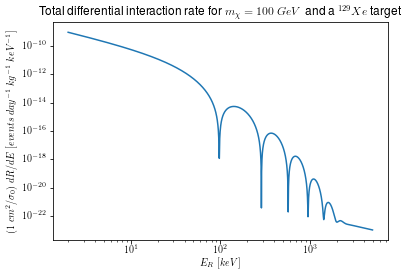

In [191]:
plt.loglog(E_recoil*1.E6,dRdE_total)
plt.xlabel(r'$E_R\ [keV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ dR/dE\ [events\ day^{-1}\ kg^{-1}\ keV^{-1}]$')
plt.title(r'Total differential interaction rate for $m_\chi=100\ GeV$ and a ${}^{129}Xe$ target')
plt.savefig("Total diff interaction rate.png",dpi=300)
plt.show()

# Total interaction rate SD & SI


In [192]:
def rate_total(E_T, E_max, A, J, para, DM_mass, v_esc, v_e, sigma, int_cross=sigma_p):
    R = integrate.quad(lambda E: diff_int_rate(E, DM_mass, A) + SD_diff_int_rate(E, A, J, para, DM_mass, v_esc, v_e, sigma),E_T,E_max)
    return R

In [193]:
E_thres = np.logspace(-6,-4,100)
R_tot = [rate_total(E_T=E, E_max = 1E-4, A=A, J=J, para=para, DM_mass=DM_mass, v_esc=v_esc, v_e=v_e, sigma=sigma)[0] for E in E_thres]

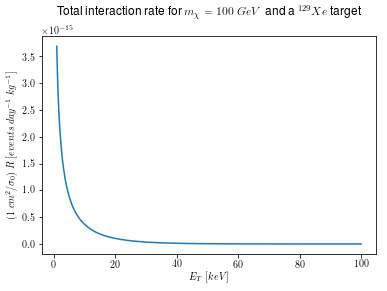

In [194]:
plt.plot(E_thres*1E6,R_tot)
plt.xlabel(r'$E_T\ [keV]$')
plt.ylabel(r'$(1\ cm^2/\sigma_0)\ R\ [events\ day^{-1}\ kg^{-1}]$')
plt.title('Total interaction rate for $m_\chi=100\ GeV$ and a ${}^{129}Xe$ target',pad=20)
plt.show()